In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [2]:
df = web.DataReader('SBIN.NS', data_source='yahoo',start='2012-01-01', end='2022-03-07')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,163.600006,161.139999,162.899994,162.764999,14464990.0,147.880920
2012-01-03,171.000000,164.300003,164.399994,170.565002,21341020.0,154.967621
2012-01-04,171.389999,167.520004,171.199997,169.604996,22241630.0,154.095398
2012-01-05,171.854996,168.005005,169.600006,169.244995,21344840.0,153.768326
2012-01-06,170.759995,165.804993,167.500000,167.274994,21137420.0,151.978485
...,...,...,...,...,...,...
2022-02-28,485.299988,473.100006,476.899994,483.200012,18069367.0,483.200012
2022-03-02,479.799988,467.000000,478.000000,474.250000,22003848.0,474.250000
2022-03-03,483.399994,464.600006,480.000000,467.399994,20358590.0,467.399994


In [23]:
data = df.filter(['Close'])
dataset=data.values
training_data_len = math.ceil(len(dataset)*.79)
training_data_len

1983

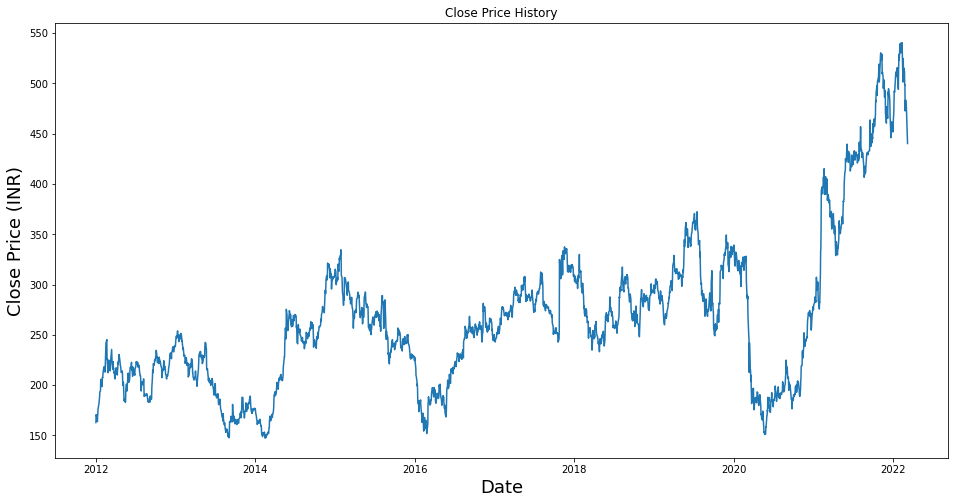

In [24]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (INR)',fontsize=18)
plt.show()

In [25]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.03917953],
       [0.05901728],
       [0.05657569],
       ...,
       [0.81395764],
       [0.8000967 ],
       [0.7450342 ]])

In [26]:
train_data = scaled_data[0:training_data_len , :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.03917953, 0.05901728, 0.05657569, 0.0556601 , 0.0506498 ,
       0.04162111, 0.05824155, 0.06443452, 0.07395916, 0.07693482,
       0.08718431, 0.09420381, 0.09963378, 0.1044533 , 0.11680105,
       0.11874667, 0.14425597, 0.14863044, 0.14420509, 0.13012792,
       0.14954603, 0.15362802, 0.15234364, 0.16011344, 0.17524607,
       0.17281721, 0.17908644, 0.180676  , 0.17759863, 0.16675145,
       0.18478344, 0.19762711, 0.22298381, 0.23994762, 0.24895088,
       0.19873344, 0.20013226, 0.18616953, 0.16512374, 0.1926931 ,
       0.1968387 , 0.18951398, 0.1966225 , 0.17865408, 0.17148199,
       0.1698797 , 0.1914596 , 0.21292506, 0.21717236, 0.22411556,
       0.21000024, 0.19184108, 0.173949  , 0.18152802, 0.19310004,
       0.17472469, 0.17628883, 0.16375034, 0.166726  , 0.15403496])]
[0.14948242786555577]



In [27]:
x_train,y_train = np.array(x_train), np.array(y_train)

In [28]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1], 1))
x_train.shape

(1923, 60, 1)

In [29]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [30]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [31]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1923/1923 [==============================] - 30s 15ms/step - loss: 0.0013


In [32]:
test_data = scaled_data[training_data_len-60: , :]
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [33]:
x_test = np.array(x_test)

In [34]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [35]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [36]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

3.052827871344389

C:\Users\kapoo\AppData\Local\Temp/ipykernel_4332/3428246292.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


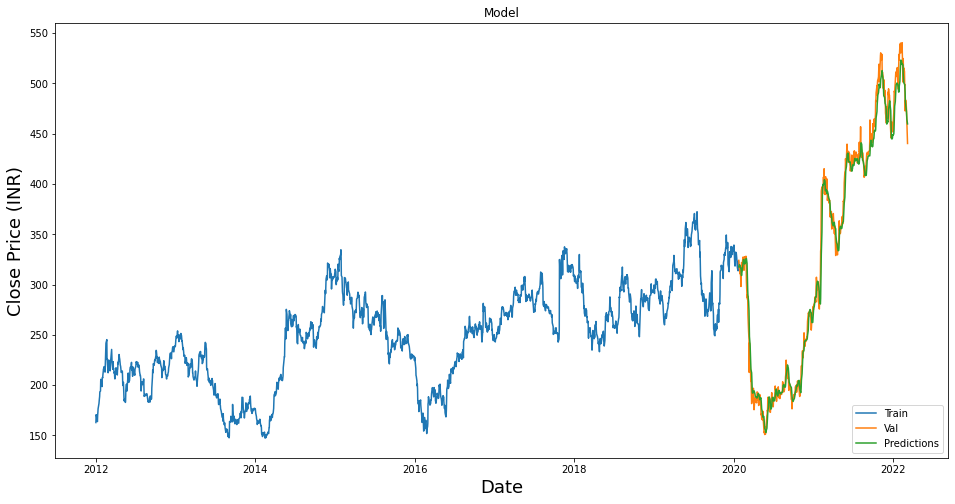

In [38]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (INR)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc ='lower right')
plt.show()

In [39]:
valid

,Close,Predictions
Date,,
2020-01-24,324.049988,317.545044
2020-01-27,316.200012,319.396698
2020-01-28,315.100006,319.752594
2020-01-29,316.450012,319.196106
2020-01-30,310.700012,318.642029
...,...,...
2022-02-28,483.200012,475.924622
2022-03-02,474.250000,472.255981
2022-03-03,467.399994,468.531189


In [43]:
sbi_quote = web.DataReader('SBIN.NS', data_source='yahoo',start='2012-01-01', end='2022-03-07')
new_df = sbi_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test=[]
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[451.27097]]


In [41]:
sbi_quote2 = web.DataReader('SBIN.NS', data_source='yahoo',start='2022-03-01', end='2022-03-08')
print(sbi_quote2['Close'])

Date
2022-03-02    474.250000
2022-03-03    467.399994
2022-03-04    461.950012
2022-03-07    440.299988
Name: Close, dtype: float64
